In [430]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,6)
%config InlineBackend.figure_formats = ['svg']

In [431]:
Lx = 1.0
Ly = 1.0
Nx = 11
Ny = 11
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
hx_square = dx**2
hy_square = dy**2

n = 4

D = 2 / hx_square + 2 / hy_square + 2

# Construct block matrices I, N, M, and A

In [432]:
I = np.eye(n)
N = np.zeros((n, n))
M = np.zeros((n, n))
A = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            if i == 1:
                M[i, j] = -1 / hx_square
            elif i == 2:
                M[i, j] = -1 / hy_square
            else:
                M[i, j] = 0
        else:
            M[i, j] = 0

        if i == j:
            if i == 0 or i == 3:
                A[i, j] = 1
            elif i == 1 or i == 2:
                if j == 1 or j == 2:
                    A[i, j] = D
                else:
                    A[i, j] = -1 / hx_square
        elif abs(i - j) == 1:
            if i == 1 or i == 2:
                A[i, j] = -1 / hx_square

# Construct the block matrix F

In [433]:
top_row = np.block([I, N, N])
middle_row = np.block([M, A, M])
bottom_row = np.block([N, N, I])
F = np.block([
    [top_row],
    [middle_row],
    [bottom_row]
])

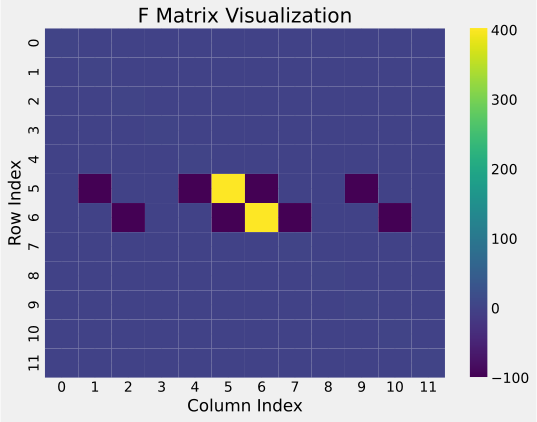

In [434]:
sns.heatmap(F, cmap='viridis')
plt.title('F Matrix Visualization')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

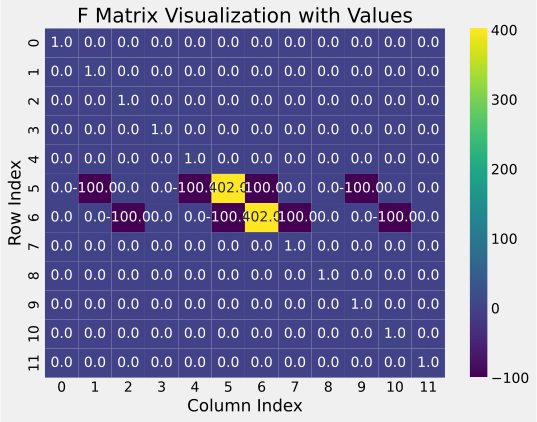

In [435]:
sns.heatmap(F, cmap='viridis', annot=True, fmt='.1f')
plt.title('F Matrix Visualization with Values')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

# Define boundary conditions and function f(x)

In [436]:
u_0 = 0.0
u_L = 2.0
f = lambda x: x**2

x = np.linspace(0, Lx, Nx+1)

b = f(x)
b[0] = u_0
b[-1] = u_L

u = np.linalg.solve(F, b)
solve_Fu_b = lambda b: np.linalg.solve(F, b)

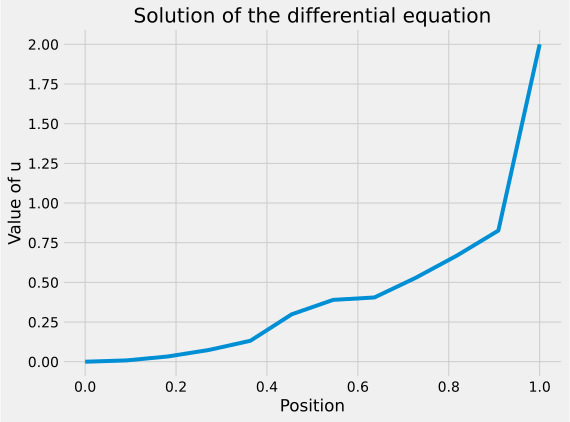

In [437]:
plt.plot(x, u)
plt.title('Solution of the differential equation')
plt.xlabel('Position')
plt.ylabel('Value of u')
plt.grid(True)
plt.show()

# Create time steps or iterations for 2D representation

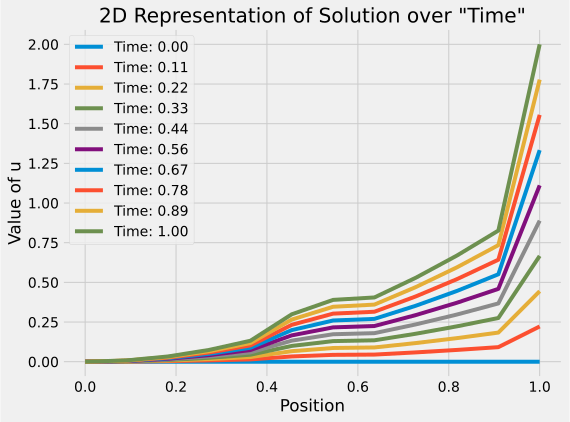

In [438]:
time_steps = np.linspace(0, 1, 10)
for t in time_steps:
    plt.plot(x, u * t, label=f'Time: {t:.2f}')

plt.title('2D Representation of Solution over "Time"')
plt.xlabel('Position')
plt.ylabel('Value of u')
plt.legend()
plt.grid(True)
plt.show()

# Create meshgrid for 3D plot

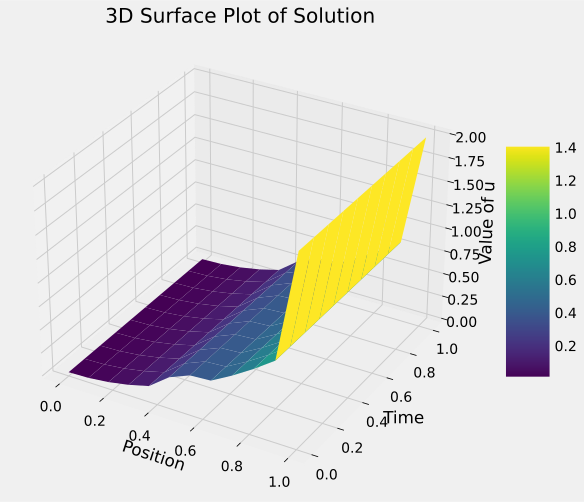

In [439]:
num_time_steps = 10
time_dimension = np.linspace(0, 1, num_time_steps)

u_3d = np.tile(u, (num_time_steps, 1))

x_3d, time_3d = np.meshgrid(x, time_dimension)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_3d, time_3d, u_3d, cmap='viridis')

ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Value of u')
ax.set_title('3D Surface Plot of Solution')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [440]:
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [441]:
print(N)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [442]:
print(M)

[[   0.    0.    0.    0.]
 [   0. -100.    0.    0.]
 [   0.    0. -100.    0.]
 [   0.    0.    0.    0.]]


In [443]:
print(A)

[[   1.    0.    0.    0.]
 [-100.  402. -100.    0.]
 [   0. -100.  402. -100.]
 [   0.    0.    0.    1.]]


In [444]:
print(F)

[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -100.    0.    0. -100.  402. -100.    0.    0. -100.    0.    0.]
 [   0.    0. -100.    0.    0. -100.  402. -100.    0.    0. -100.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.]]


In [445]:
print(b)

[0.         0.00826446 0.03305785 0.07438017 0.1322314  0.20661157
 0.29752066 0.40495868 0.52892562 0.66942149 0.82644628 2.        ]


In [448]:
print(f"Shape of I: {np.array(I).shape}")
print(f"Shape of N: {np.array(N).shape}")
print(f"Shape of M: {np.array(M).shape}")
print(f"Shape of A: {np.array(A).shape}")
print(f"Shape of F: {F.shape}")
print(f"Shape of b: {b.shape}")
print(f"Shape of u: {u.shape}")

Shape of I: (4, 4)
Shape of N: (4, 4)
Shape of M: (4, 4)
Shape of A: (4, 4)
Shape of F: (12, 12)
Shape of b: (12,)
Shape of u: (12,)


In [449]:
print(u)

[0.         0.00826446 0.03305785 0.07438017 0.1322314  0.29891108
 0.38963908 0.40495868 0.52892562 0.66942149 0.82644628 2.        ]


In [450]:
x_mesh, y_mesh = np.meshgrid(u, u)

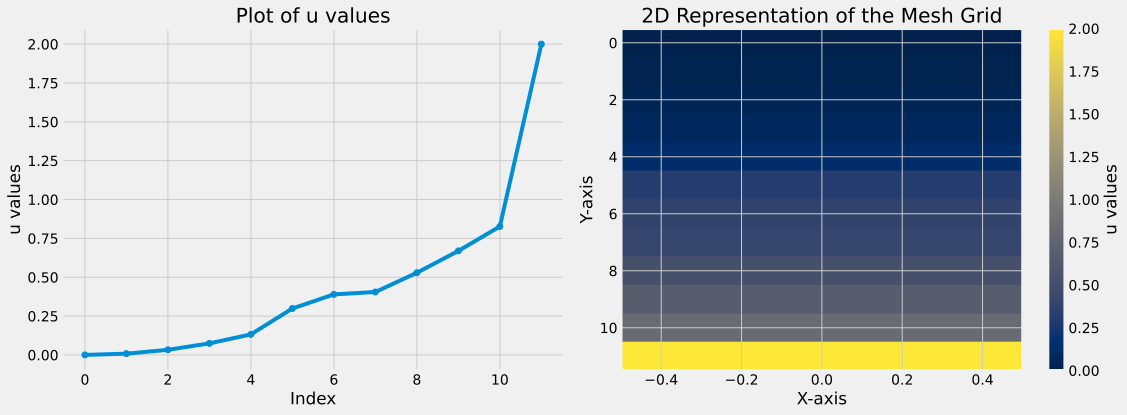

<Figure size 800x600 with 0 Axes>

In [451]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

indices = np.arange(len(u))
ax1.plot(indices, u, marker='o', linestyle='-')
ax1.set_xlabel('Index')
ax1.set_ylabel('u values')
ax1.set_title('Plot of u values')
ax1.grid(True)


im = ax2.imshow(u.reshape(-1, 1), cmap='cividis', aspect='auto')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_title('2D Representation of the Mesh Grid')
plt.colorbar(im, ax=ax2, label='u values')

plt.tight_layout()
plt.show()

ax = fig.add_subplot(111, projection='3d')


indices = np.arange(len(u))
ax.plot(indices, np.zeros_like(u), u, marker='o', linestyle='-', label='Plot of u values')
ax.set_xlabel('Index')
ax.set_ylabel('Y-axis')
ax.set_zlabel('u values')
ax.legend()

extent = [0, len(u), 0, 1]
ax.imshow(u.reshape(-1, 1), cmap='cividis', aspect='auto', extent=extent, alpha=0)

plt.tight_layout()
plt.show()

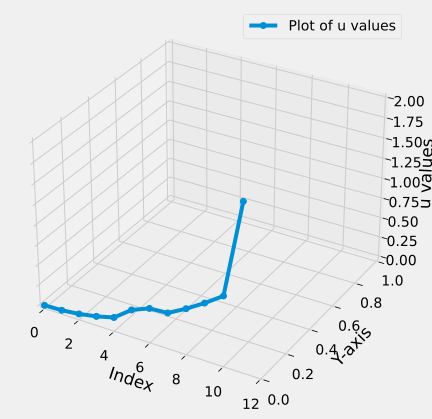

In [452]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

indices = np.arange(len(u))
ax.plot(indices, np.zeros_like(u), u, marker='o', linestyle='-', label='Plot of u values')
ax.set_xlabel('Index')
ax.set_ylabel('Y-axis')
ax.set_zlabel('u values')
ax.legend()

extent = [0, len(u), 0, 1]
ax.imshow(u.reshape(-1, 1), cmap='cividis', aspect='auto', extent=extent, alpha=0)

plt.tight_layout()
plt.show()

In [453]:
import pandas as pd

In [468]:
df = pd.DataFrame({'x':x , 'u':u , 'b':b })
csv_file_path = 'u.csv'
df.to_csv(csv_file_path , index=False)

In [469]:
df = pd.read_csv(csv_file_path)

In [470]:
from IPython.display import display
display(df)

,x,u,b
0,0.000000,0.000000,0.000000
1,0.090909,0.008264,0.008264
2,0.181818,0.033058,0.033058
3,0.272727,0.074380,0.074380
4,0.363636,0.132231,0.132231
5,0.454545,0.298911,0.206612
6,0.545455,0.389639,0.297521
7,0.636364,0.404959,0.404959
8,0.727273,0.528926,0.528926
9,0.818182,0.669421,0.669421


<Axes: ylabel='x'>

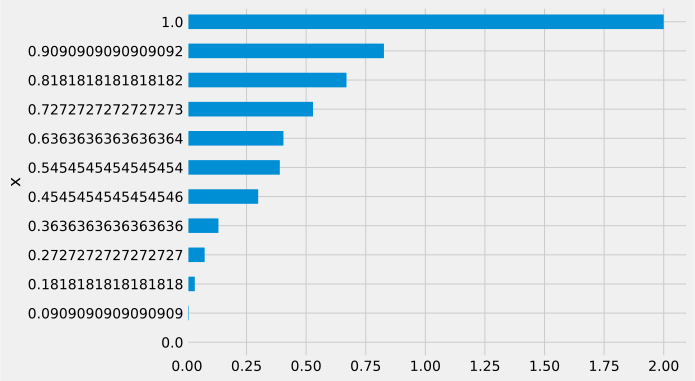

In [530]:
df.groupby('x').u.mean().sort_values().plot.barh()

<Axes: ylabel='Frequency'>

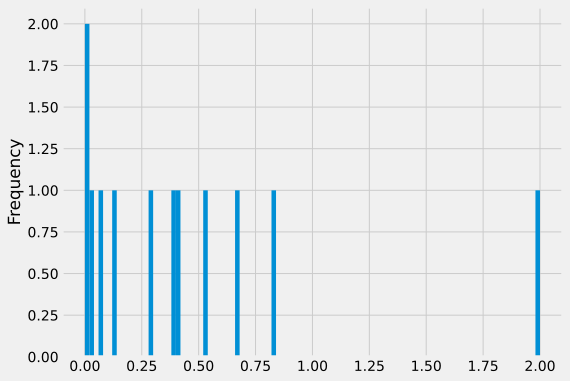

In [472]:
df.u.plot.hist(bins=100)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Frequency'>

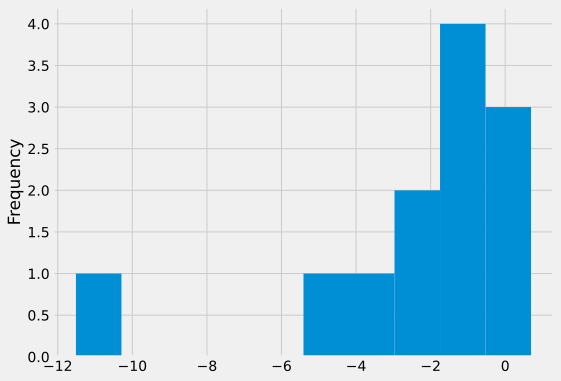

In [473]:
target = np.log(df['u'].abs())
epsilon = 1e-5
target = np.log(df['u'] + epsilon)
target.plot.hist()

<Axes: >

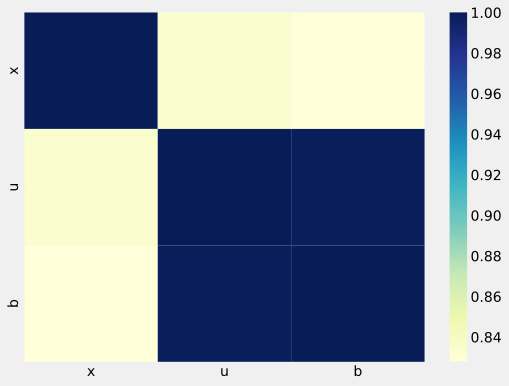

In [474]:
import seaborn as sns
sns.heatmap(df.corr() , cmap='YlGnBu')

In [475]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [476]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

x_train = train_data['x'].values.reshape(-1, 1)
u_train = train_data['u'].values.reshape(-1, 1)

scaler_x = MinMaxScaler()
scaler_u = MinMaxScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
u_train_scaled = scaler_u.fit_transform(u_train)

In [495]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train_scaled, u_train_scaled, epochs=500, verbose=0)

In [496]:
new_x = np.linspace(0, 1, 1000)

new_x_scaled = scaler_x.transform(new_x.reshape(-1, 1))

u_predicted_scaled = model.predict(new_x_scaled)
u_predicted = scaler_u.inverse_transform(u_predicted_scaled)

32/32 [==============================] - 0s 3ms/step


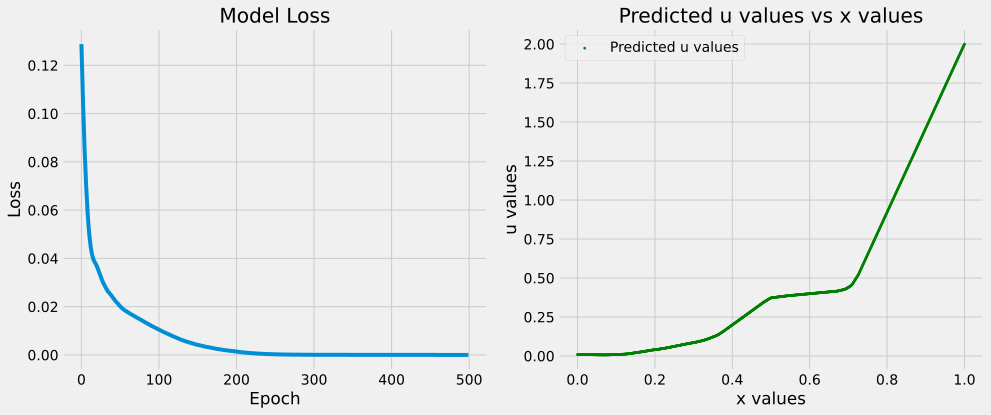

In [497]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(history.history['loss'])
axs[0].set_title('Model Loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')

axs[1].scatter(new_x, u_predicted, color='g', label='Predicted u values', s=5)
axs[1].set_xlabel('x values')
axs[1].set_ylabel('u values')
axs[1].set_title('Predicted u values vs x values')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [507]:
from sklearn.metrics import mean_squared_error, r2_score

u_train_predicted = model.predict(x_train_scaled)
u_test_predicted = model.predict(x_test_scaled)

mse_train = mean_squared_error(u_train, u_train_predicted)
mse_test = mean_squared_error(u_test, u_test_predicted)

r2_train = r2_score(u_train, u_train_predicted)
r2_test = r2_score(u_test, u_test_predicted)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train R2 score: {r2_train}, Test R2 score: {r2_test}")

1/1 [==============================] - 0s 31ms/step
Train MSE: 0.13155072670132878, Test MSE: 0.010485484143325912
Train R2 score: 0.6111395304300273, Test R2 score: 0.9183511547050046


In [528]:
x_pred = 0.87352536521000
y_pred = x_pred

y_pred_scaled = scaler_x.transform(np.array([y_pred]).reshape(-1, 1))
u_pred_scaled = model.predict(y_pred_scaled)
u_pred = scaler_u.inverse_transform(u_pred_scaled)

print(f"For x = {x_pred}, predicted u = {u_pred}")

1/1 [==============================] - 0s 230ms/step
For x = 0.87352536521, predicted u = [[1.3177953]]
